In [2]:
# Data processing 
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

df_2022 = pd.read_csv('datasets/WR_AdvancedStats_2022.csv')
df_2021 = pd.read_csv('datasets/WR_AdvancedStats_2021.csv')
df_2020 = pd.read_csv('datasets/WR_AdvancedStats_2020.csv')
df_2019 = pd.read_csv('datasets/WR_AdvancedStats_2019.csv')
df_2018 = pd.read_csv('datasets/WR_AdvancedStats_2018.csv')

In [3]:
df = pd.concat([df_2022,df_2021,df_2020,df_2019,df_2018], axis=0)

In [4]:
df.columns

Index(['Rank', 'Player', 'Year', 'G', 'REC', 'YDS', 'YBC', 'AIR', 'YAC',
       'YACON', 'BRKTKL', 'TGT', 'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS',
       '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS'],
      dtype='object')

In [8]:
df.head()

,Rank,Player,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
0,1,Justin Jefferson (MIN),2022,17,8,106,70,70,37,8,0,11,8,0,2,4,2,1,0,0
1,2,Davante Adams (LV),2022,17,6,89,60,60,29,6,1,11,6,0,1,4,1,1,0,0
2,3,Tyreek Hill (MIA),2022,17,7,101,72,72,28,3,0,10,7,0,1,4,1,1,0,0
3,4,A.J. Brown (PHI),2022,17,5,88,56,56,32,11,0,9,6,0,1,3,1,1,0,0
4,5,Stefon Diggs (BUF),2022,17,6,86,60,60,25,6,0,9,7,0,1,3,1,1,0,0


In [9]:
df.tail()

,Rank,Player,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
973,180,Brian Quick (FA),2018,6,1,3,3,3,0,0,0,1,1,0,0,0,0,0,0,0
974,181,Nick Williams (FA),2018,4,1,4,3,3,1,1,0,1,1,0,0,0,0,0,0,0
975,182,Josh Malone (FA),2018,9,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
976,183,Victor Bolden Jr. (FA),2018,6,0,2,2,2,0,0,0,1,0,0,0,0,0,0,0,0
977,184,Jeremy Kerley (FA),2018,1,2,7,-8,-8,15,2,0,4,3,1,0,0,0,0,0,0


In [7]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       978 non-null    int64 
 1   Player     978 non-null    object
 2   Year       978 non-null    int64 
 3   G          978 non-null    int64 
 4   REC        978 non-null    int64 
 5   YDS        978 non-null    int64 
 6   YBC        978 non-null    int64 
 7   AIR        978 non-null    int64 
 8   YAC        978 non-null    int64 
 9   YACON      978 non-null    int64 
 10  BRKTKL     978 non-null    int64 
 11  TGT        978 non-null    int64 
 12  CATCHABLE  978 non-null    int64 
 13  DROP       978 non-null    int64 
 14  RZ TGT     978 non-null    int64 
 15  10+ YDS    978 non-null    int64 
 16  20+ YDS    978 non-null    int64 
 17  30+ YDS    978 non-null    int64 
 18  40+ YDS    978 non-null    int64 
 19  50+ YDS    978 non-null    int64 
dtypes: int64(19), object(1)
memory u

In [12]:
df.to_csv('datasets/WR_Advanced_2018_2022.csv', index=True)

In [13]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rank,0,0.0
Player,0,0.0
40+ YDS,0,0.0
30+ YDS,0,0.0
20+ YDS,0,0.0
10+ YDS,0,0.0
RZ TGT,0,0.0
DROP,0,0.0
CATCHABLE,0,0.0
TGT,0,0.0


In [14]:
df.describe()

,Rank,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,98.428425,2020.036810,11.826176,2.574642,32.437628,21.400818,21.400818,11.054192,3.254601,0.051125,4.110429,2.810838,0.074642,0.386503,1.310838,0.411043,0.085890,0.015337,0.003067
std,56.713699,1.401372,4.385055,1.825289,23.796104,16.560700,16.560700,9.183567,3.374540,0.220365,2.652141,1.950777,0.262947,0.523649,1.050177,0.518601,0.280344,0.122954,0.055328
min,1.000000,2018.000000,1.000000,0.000000,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.250000,2019.000000,8.000000,1.000000,12.000000,8.000000,8.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,98.000000,2020.000000,13.000000,2.000000,27.000000,18.000000,18.000000,9.000000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,147.000000,2021.000000,16.000000,4.000000,48.000000,32.000000,32.000000,16.000000,5.000000,0.000000,6.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,206.000000,2022.000000,17.000000,9.000000,115.000000,77.000000,77.000000,57.000000,36.000000,1.000000,12.000000,10.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000


C:\Users\AGJHINSO\AppData\Local\Temp\ipykernel_43968\549424551.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax)


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Year'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'REC'}>],
       [<Axes: title={'center': 'YDS'}>, <Axes: title={'center': 'YBC'}>,
        <Axes: title={'center': 'AIR'}>, <Axes: title={'center': 'YAC'}>],
       [<Axes: title={'center': 'YACON'}>,
        <Axes: title={'center': 'BRKTKL'}>,
        <Axes: title={'center': 'TGT'}>,
        <Axes: title={'center': 'CATCHABLE'}>],
       [<Axes: title={'center': 'DROP'}>,
        <Axes: title={'center': 'RZ TGT'}>,
        <Axes: title={'center': '10+ YDS'}>,
        <Axes: title={'center': '20+ YDS'}>],
       [<Axes: title={'center': '30+ YDS'}>,
        <Axes: title={'center': '40+ YDS'}>,
        <Axes: title={'center': '50+ YDS'}>, <Axes: >]], dtype=object)

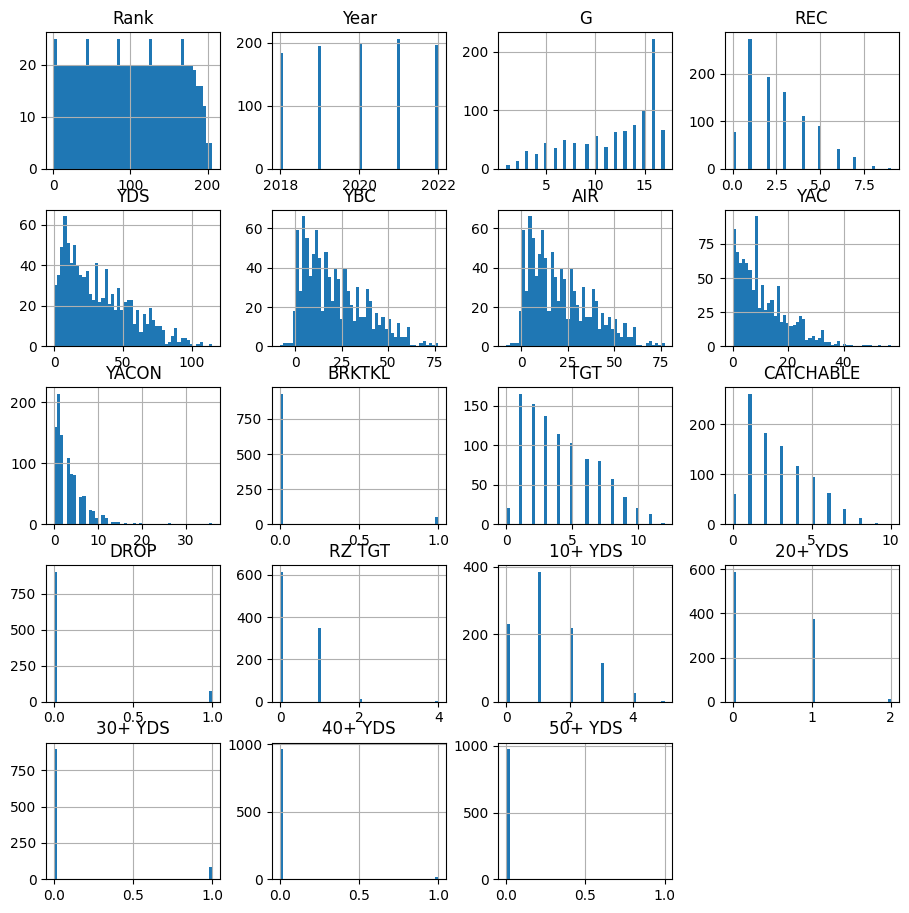

In [15]:
# Look at the distribution of the data
fig, ax = plt.subplots(figsize=(11, 11))
df.hist(bins=50, ax=ax)

C:\Users\AGJHINSO\AppData\Local\Temp\ipykernel_43968\3907054652.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


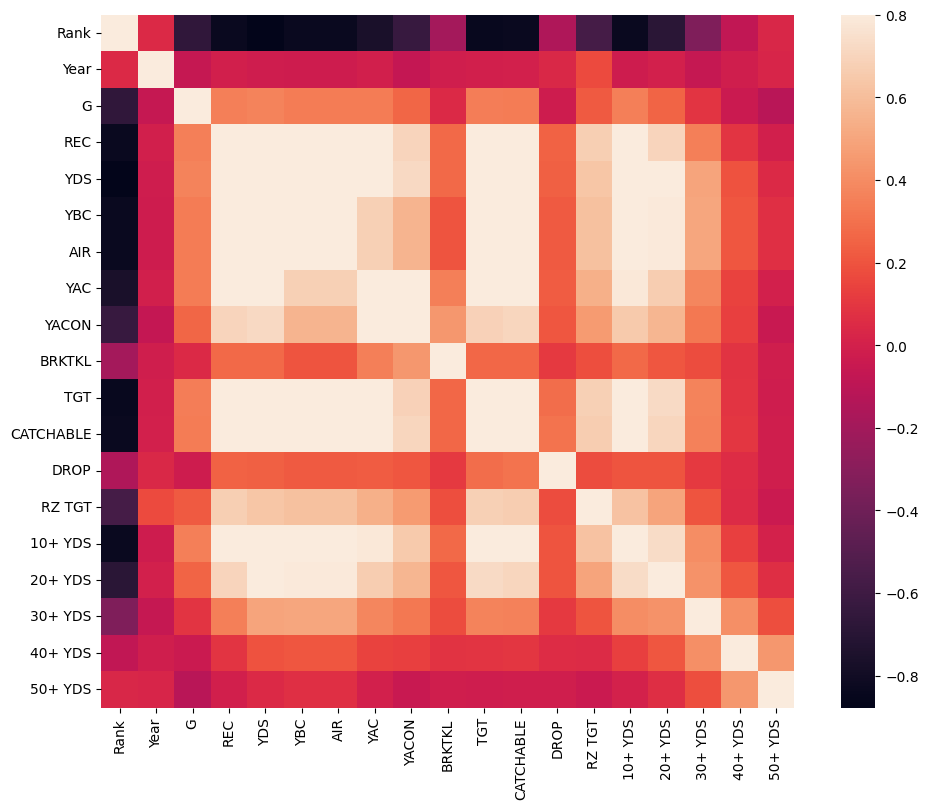

In [16]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

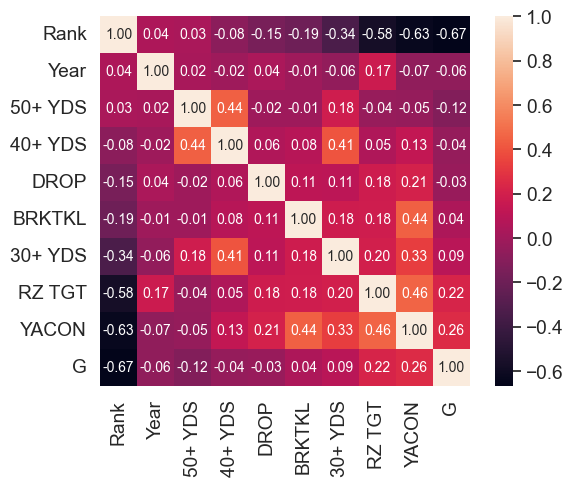

In [17]:
#result correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Rank')['Rank'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

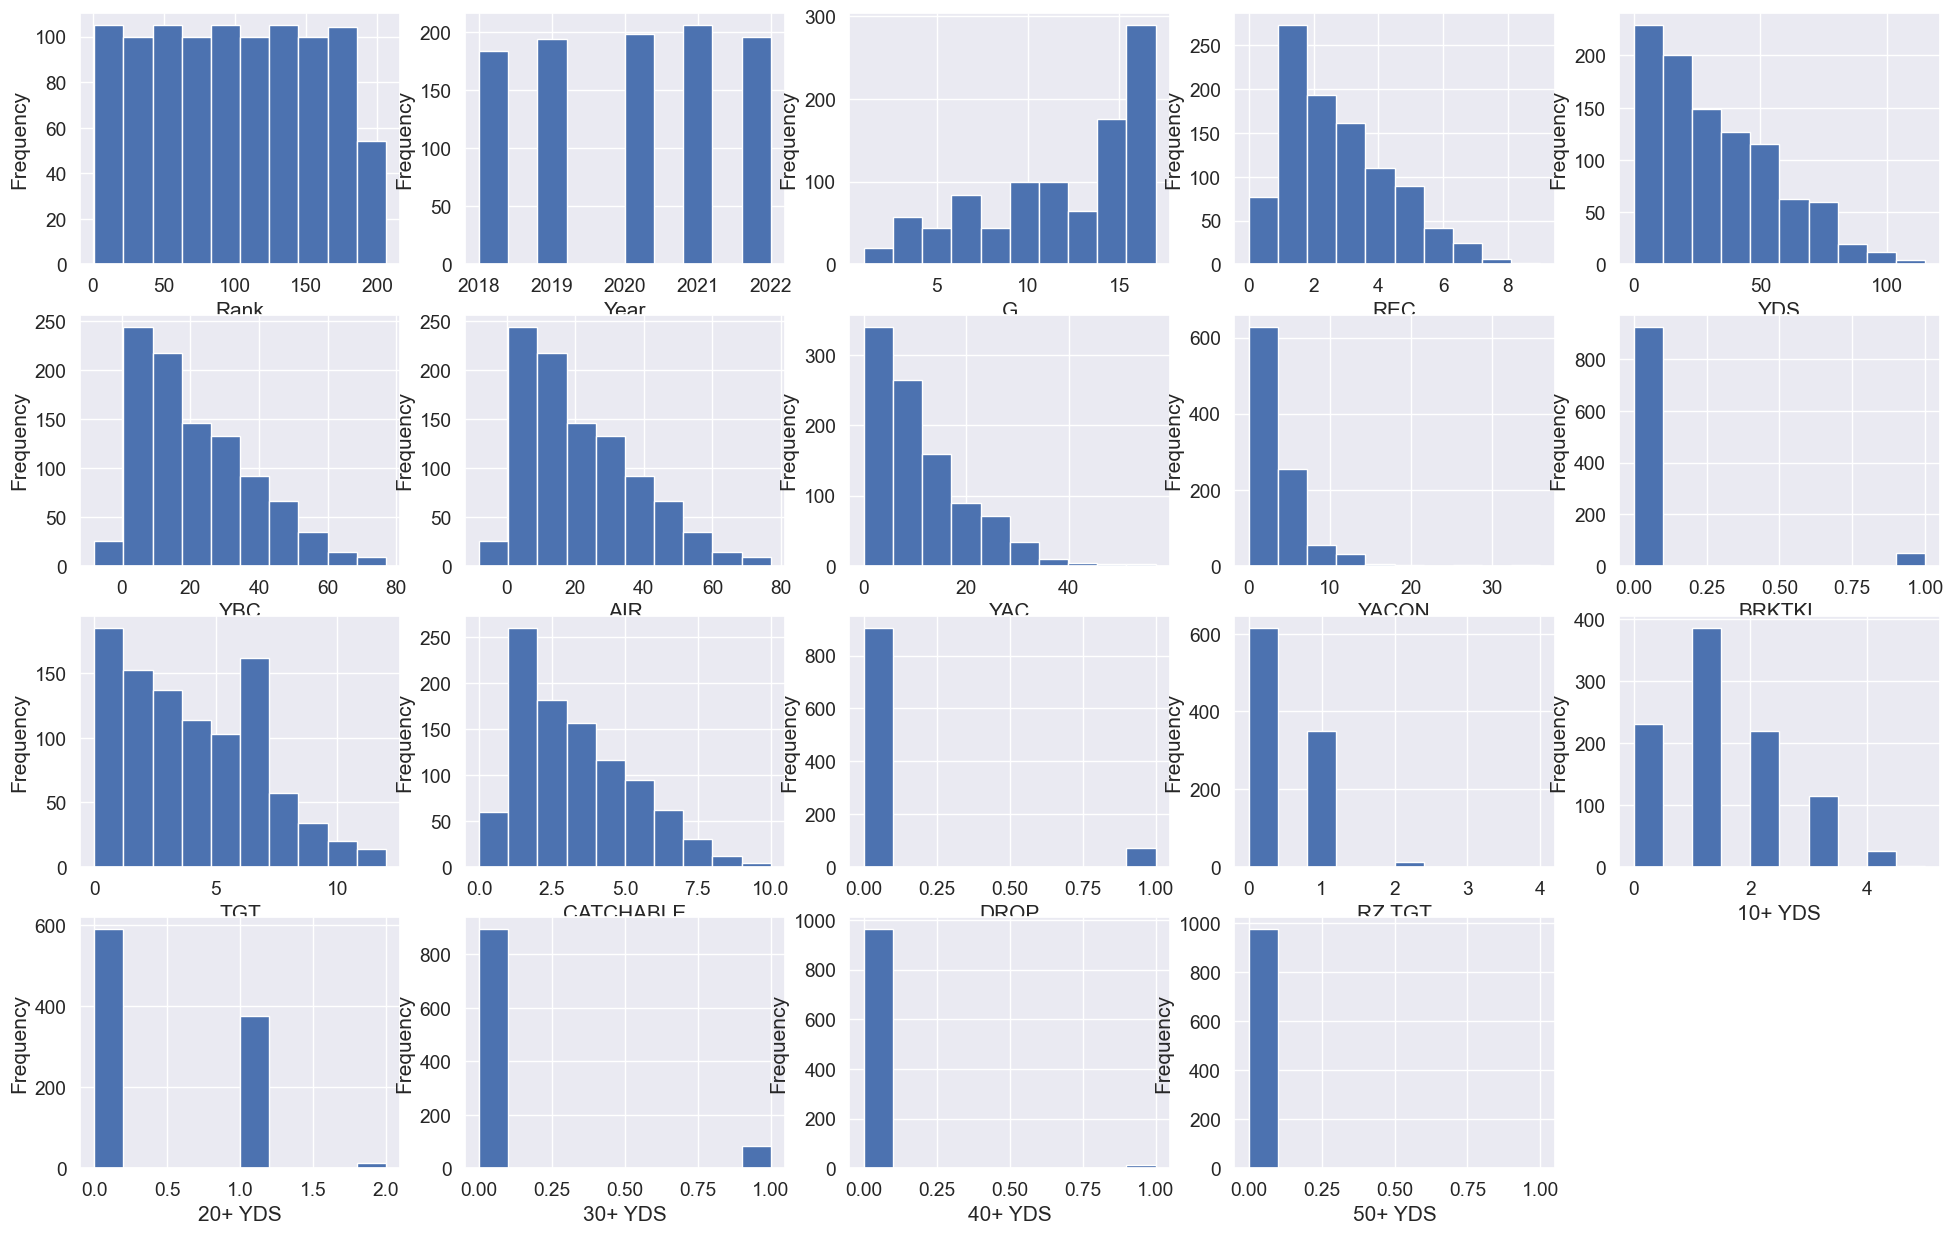

In [19]:
df1=df.select_dtypes(exclude=['object'])
fig = plt.figure(figsize=(24,15))
i = 0
for column in df1:
    sub = fig.add_subplot(4,5,i+1)
    sub.set_xlabel(column)
    df1[column].plot(kind='hist')
    i+=1

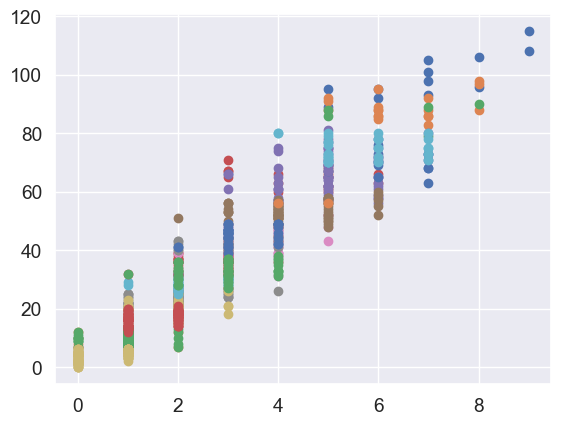

In [21]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# retrieve the array
data = df1.values
# split into input and output elements
X= data[:, 3:]
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [20]:
# retrieve the array
data = df1.values
# split into input and output elements
X= data[:, 3:]

In [22]:
df['Cluster'] = yhat

In [27]:
df.groupby('Cluster').get_group(0)

,Rank,Player,Year,G,REC,YDS,YBC,AIR,YAC,YACON,...,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Cluster
0,1,Justin Jefferson (MIN),2022,17,8,106,70,70,37,8,...,11,8,0,2,4,2,1,0,0,0
2,3,Tyreek Hill (MIA),2022,17,7,101,72,72,28,3,...,10,7,0,1,4,1,1,0,0,0
196,1,Cooper Kupp (LAR),2021,17,9,115,65,65,50,15,...,11,9,0,2,4,2,1,1,0,0
199,4,Justin Jefferson (MIN),2021,17,6,95,67,67,28,9,...,10,7,0,1,4,2,1,0,0,0
404,3,Stefon Diggs (BUF),2020,16,8,96,67,67,29,11,...,10,9,1,1,4,1,0,0,0,0
405,4,Calvin Ridley (JAC),2020,15,6,92,73,73,18,5,...,10,6,0,1,4,2,1,0,0,0
600,1,Michael Thomas (NO),2019,16,9,108,71,71,36,10,...,12,10,0,1,5,1,0,0,0,0
604,5,Julio Jones (FA),2019,15,7,93,69,69,24,9,...,10,7,0,1,4,1,1,0,0,0
607,8,Mike Evans (TB),2019,13,5,89,69,69,20,8,...,9,6,1,1,4,1,1,1,0,0
797,4,DeAndre Hopkins (ARI),2018,16,7,98,74,74,24,5,...,10,8,0,1,4,1,1,0,0,0


0           Axes(0.1,0.77069;0.137931x0.12931)
1      Axes(0.265517,0.77069;0.137931x0.12931)
2      Axes(0.431034,0.77069;0.137931x0.12931)
3      Axes(0.596552,0.77069;0.137931x0.12931)
4      Axes(0.762069,0.77069;0.137931x0.12931)
5          Axes(0.1,0.615517;0.137931x0.12931)
6     Axes(0.265517,0.615517;0.137931x0.12931)
7     Axes(0.431034,0.615517;0.137931x0.12931)
8     Axes(0.596552,0.615517;0.137931x0.12931)
9     Axes(0.762069,0.615517;0.137931x0.12931)
10         Axes(0.1,0.460345;0.137931x0.12931)
11    Axes(0.265517,0.460345;0.137931x0.12931)
12    Axes(0.431034,0.460345;0.137931x0.12931)
13    Axes(0.596552,0.460345;0.137931x0.12931)
14    Axes(0.762069,0.460345;0.137931x0.12931)
15         Axes(0.1,0.305172;0.137931x0.12931)
16    Axes(0.265517,0.305172;0.137931x0.12931)
17    Axes(0.431034,0.305172;0.137931x0.12931)
18    Axes(0.596552,0.305172;0.137931x0.12931)
19    Axes(0.762069,0.305172;0.137931x0.12931)
20             Axes(0.1,0.15;0.137931x0.12931)
21        Axe

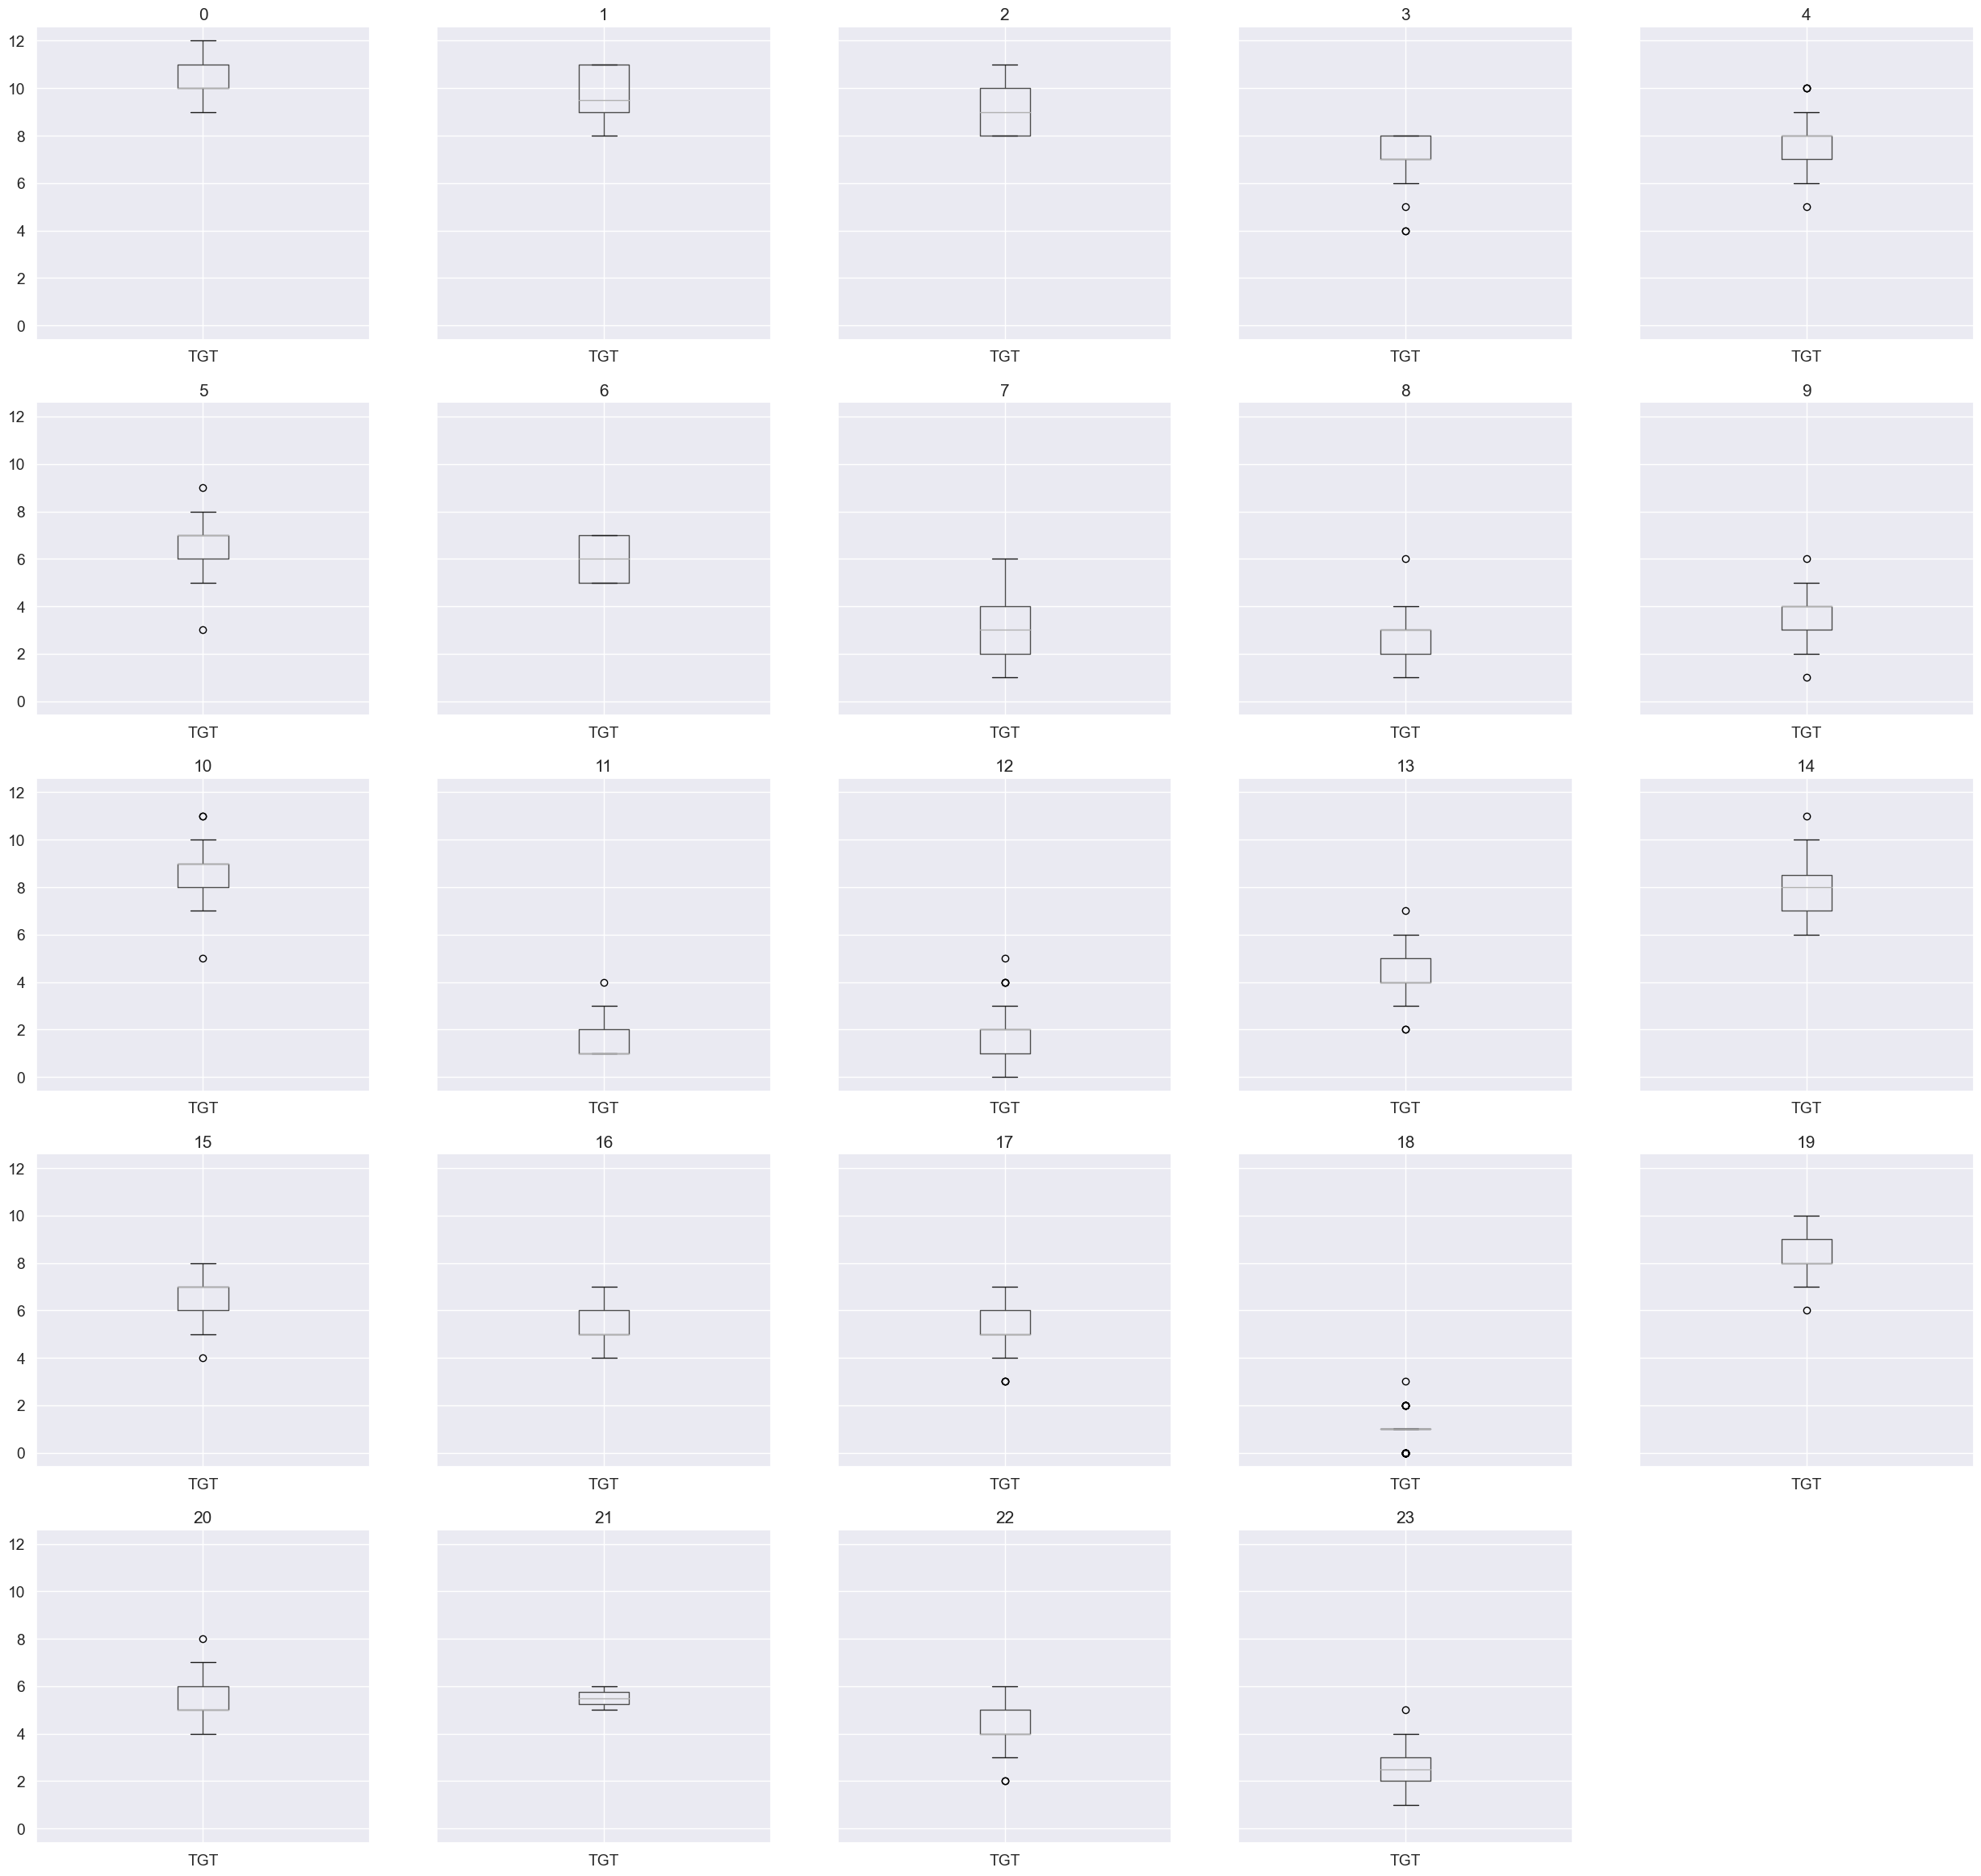

In [37]:
df.groupby('Cluster').boxplot(column='TGT', figsize=(30,30))

Deciding Number of Clusters for Model

In [38]:
df.drop('Cluster',axis=1,inplace=True)

In [39]:
# Dimensionality reduction
from sklearn.decomposition import PCA
# Modeling
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
# Number of clusters
from sklearn.metrics import silhouette_score

Kmeans with Elbow method

In [46]:
import warnings
warnings.simplefilter('ignore')
# Create an empty dictionary to save the within cluster sum of square values
wcss = {} 
# Look through the number of clusters
for i in range(1,10):
  # Run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  #Sum of squared distances of samples to their closest cluster center.
  wcss[i] = (kmeans.inertia_)
  # Print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}')

The within cluster sum of squares for 1 clusters is 1198315.02
The within cluster sum of squares for 2 clusters is 387418.68
The within cluster sum of squares for 3 clusters is 210684.15
The within cluster sum of squares for 4 clusters is 152816.14
The within cluster sum of squares for 5 clusters is 120361.68
The within cluster sum of squares for 6 clusters is 103043.40
The within cluster sum of squares for 7 clusters is 90044.83
The within cluster sum of squares for 8 clusters is 78920.52
The within cluster sum of squares for 9 clusters is 70287.00


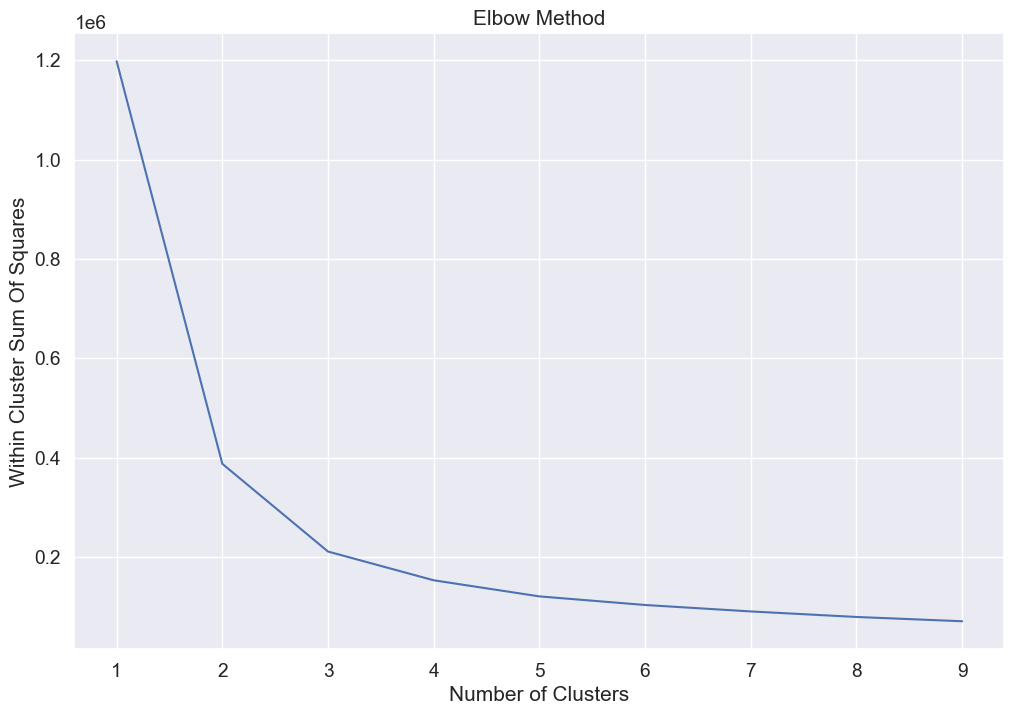

In [47]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

Silhouette Score

In [48]:
# Create an empty dictionary for the Silhouette score
s_score = {} 
# Loop through the number of clusters
for i in range(2,10): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  # Make prediction
  classes = kmeans.predict(X)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(X, classes)) 
  # Print the Silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

The silhouette score for 2 clusters is 0.583
The silhouette score for 3 clusters is 0.525
The silhouette score for 4 clusters is 0.474
The silhouette score for 5 clusters is 0.431
The silhouette score for 6 clusters is 0.408
The silhouette score for 7 clusters is 0.410
The silhouette score for 8 clusters is 0.386
The silhouette score for 9 clusters is 0.388


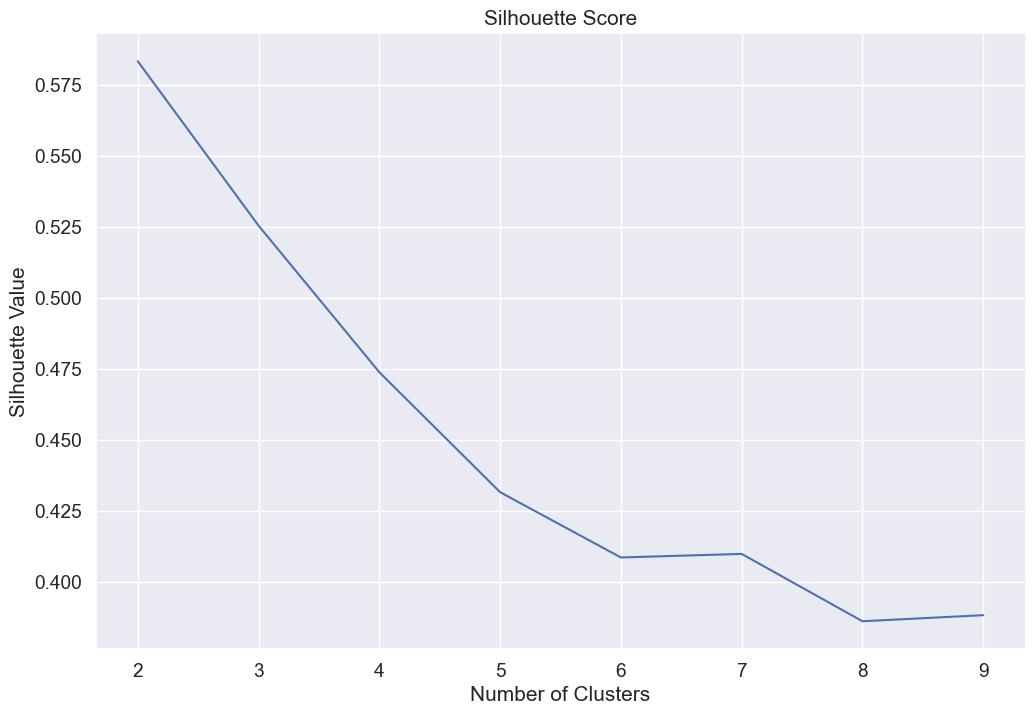

In [49]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

Deciding Number of Clusters Using Hierarchical Graph

Text(0, 0.5, 'Euclidean Distance')

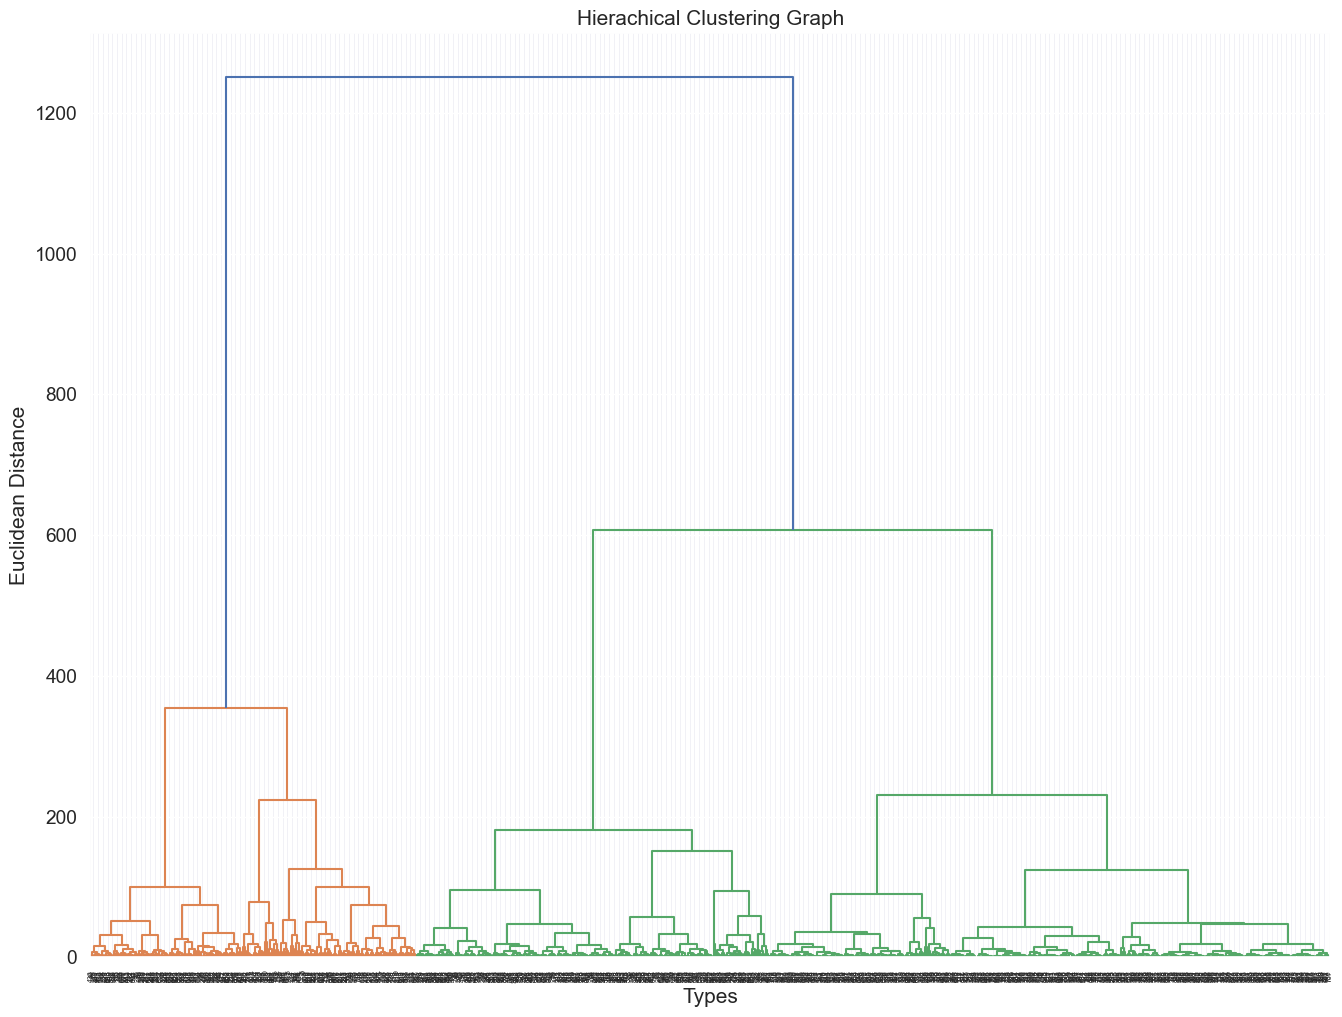

In [50]:
# Change figure size
plt.figure(figsize=(16,12))
# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm
# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Types')
plt.ylabel('Euclidean Distance')

Deciding Number of Clusters Using AIC and BIC from GMM

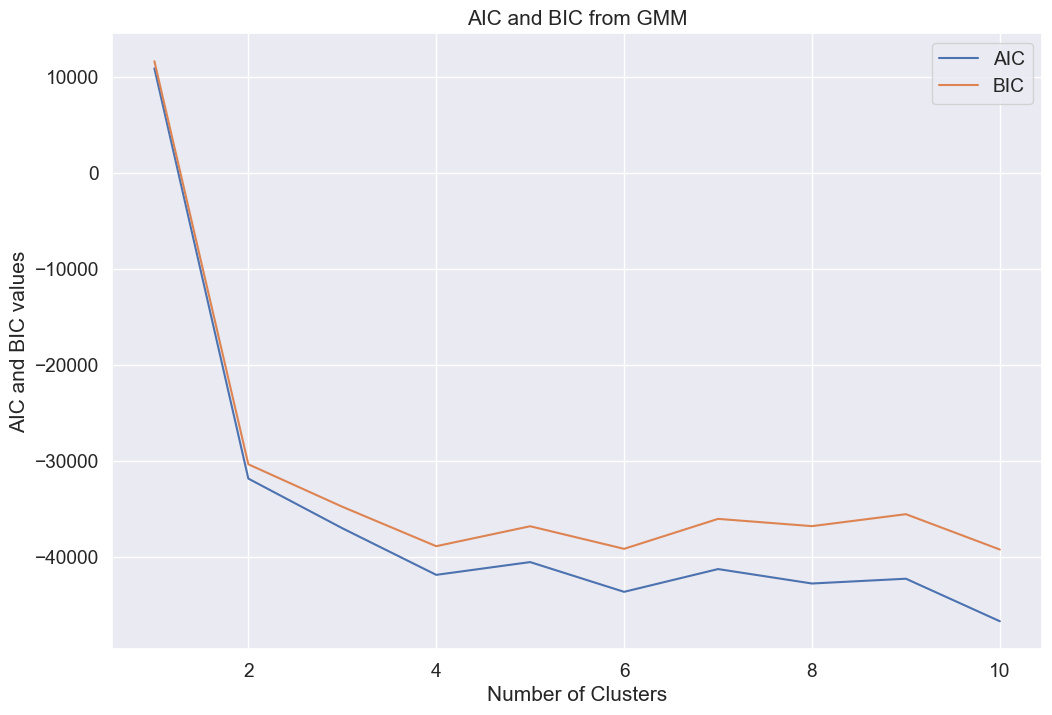

In [51]:
# Create empty dictionary for AIC and BIC values
aic_score = {} 
bic_score = {}
# Loop through different number of clusters
for i in range(1,11): 
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
  # Get AIC score for the model
  aic_score[i] = gmm.aic(X)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(X)
# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

Deciding Number of Clusters Using Gap Statistics

In [52]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

Optimal k is:  10


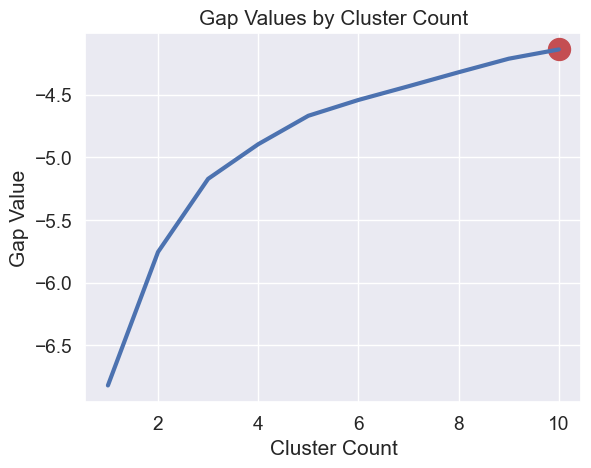

In [53]:
# Automatically output the number of clusters
k, gapdf = optimalK(X, nrefs=3, maxClusters=11)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

Optimal number of cluster is somewhere between 3 and 4

In [54]:
# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)
# Save the predictions as a column
df['y_kmeans_3']=y_kmeans
# Check the distribution
df['y_kmeans_3'].value_counts()

1    463
0    330
2    185
Name: y_kmeans_3, dtype: int64

In [57]:
df.groupby('y_kmeans_3').describe()

Rank                                                           \
            count        mean        std   min    25%    50%    75%    max   
y_kmeans_3                                                                   
0           330.0   72.890909  31.760888  13.0   49.0   68.5   91.0  176.0   
1           463.0  144.950324  33.406452  59.0  121.0  148.0  172.5  206.0   
2           185.0   27.551351  28.395476   1.0   10.0   20.0   32.0  172.0   

             Year               ... 40+ YDS      50+ YDS                      \
            count         mean  ...     75%  max   count      mean       std   
y_kmeans_3                      ...                                            
0           330.0  2020.030303  ...     0.0  1.0   330.0  0.003030  0.055048   
1           463.0  2020.043197  ...     0.0  0.0   463.0  0.000000  0.000000   
2           185.0  2020.032432  ...     0.0  1.0   185.0  0.010811  0.103692   

                                     
            min  25%  50%  75%  max  
y_kmeans_3                           
0           0.0  0.0  0.0  0.0  1.0  
1           0.0  0.0  0.0  0.0  0.0  
2           0.0  0.0  0.0  0.0  1.0  

[3 rows x 152 columns]

In [63]:
df.groupby('y_kmeans_3').get_group(0).describe()

,Rank,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,y_kmeans_3
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0
mean,72.890909,2020.030303,12.787879,3.087879,39.115152,25.630303,25.630303,13.521212,3.939394,0.054545,4.918182,3.375758,0.084848,0.493939,1.557576,0.593939,0.045455,0.006061,0.003030,0.0
std,31.760888,1.430983,3.784126,0.949246,8.738975,6.684578,6.684578,7.006803,3.244255,0.227436,1.378064,1.045189,0.279079,0.500723,0.532831,0.491842,0.208615,0.077731,0.055048,0.0
min,13.000000,2018.000000,1.000000,1.000000,24.000000,-1.000000,-1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,49.000000,2019.000000,10.000000,2.000000,32.000000,21.000000,21.000000,9.000000,2.000000,0.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,68.500000,2020.000000,14.000000,3.000000,39.000000,25.000000,25.000000,12.000000,3.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,91.000000,2021.000000,16.000000,4.000000,46.000000,30.000000,30.000000,16.750000,5.000000,0.000000,6.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,176.000000,2022.000000,17.000000,6.000000,60.000000,41.000000,41.000000,57.000000,36.000000,1.000000,9.000000,6.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [64]:
df.groupby('y_kmeans_3').get_group(1).describe()

,Rank,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,y_kmeans_3
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.00000,463.000000,463.000000,463.0,463.0,463.0
mean,144.950324,2020.043197,10.304536,1.120950,12.317495,7.706263,7.706263,4.632829,1.300216,0.008639,1.956803,1.248380,0.019438,0.088553,0.50324,0.017279,0.004320,0.0,0.0,1.0
std,33.406452,1.393504,4.563658,0.710507,6.822158,5.097332,5.097332,3.794956,1.504157,0.092646,1.090232,0.756553,0.138209,0.284405,0.50053,0.130449,0.065653,0.0,0.0,0.0
min,59.000000,2018.000000,1.000000,0.000000,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,1.0
25%,121.000000,2019.000000,6.000000,1.000000,7.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,1.0
50%,148.000000,2020.000000,10.000000,1.000000,12.000000,7.000000,7.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,0.0,1.0
75%,172.500000,2021.000000,15.000000,2.000000,18.000000,12.000000,12.000000,6.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.0,0.0,1.0
max,206.000000,2022.000000,17.000000,4.000000,31.000000,20.000000,20.000000,32.000000,9.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,0.0,1.0


In [65]:
df.groupby('y_kmeans_3').get_group(2).describe()

,Rank,Year,G,REC,YDS,YBC,AIR,YAC,YACON,BRKTKL,TGT,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,y_kmeans_3
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.0
mean,27.551351,2020.032432,13.918919,5.297297,70.881081,48.129730,48.129730,22.724324,6.924324,0.151351,8.059459,5.713514,0.194595,0.940541,2.891892,1.070270,0.362162,0.070270,0.010811,2.0
std,28.395476,1.374862,3.509137,1.252495,12.989415,9.423285,9.423285,8.500940,3.460130,0.359364,1.564459,1.276494,0.396963,0.501877,0.675011,0.256296,0.481930,0.256296,0.103692,0.0
min,1.000000,2018.000000,1.000000,2.000000,51.000000,31.000000,31.000000,5.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.0
25%,10.000000,2019.000000,13.000000,5.000000,61.000000,41.000000,41.000000,17.000000,5.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.0
50%,20.000000,2020.000000,15.000000,5.000000,69.000000,47.000000,47.000000,22.000000,7.000000,0.000000,8.000000,6.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.0
75%,32.000000,2021.000000,16.000000,6.000000,78.000000,54.000000,54.000000,28.000000,9.000000,0.000000,9.000000,6.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.0
max,172.000000,2022.000000,17.000000,9.000000,115.000000,77.000000,77.000000,53.000000,20.000000,1.000000,12.000000,10.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,2.0


In [68]:
df1.columns

Index(['Rank', 'Year', 'G', 'REC', 'YDS', 'YBC', 'AIR', 'YAC', 'YACON',
       'BRKTKL', 'TGT', 'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS',
       '30+ YDS', '40+ YDS', '50+ YDS'],
      dtype='object')

In [69]:
df1['y_kmeans_3']=y_kmeans

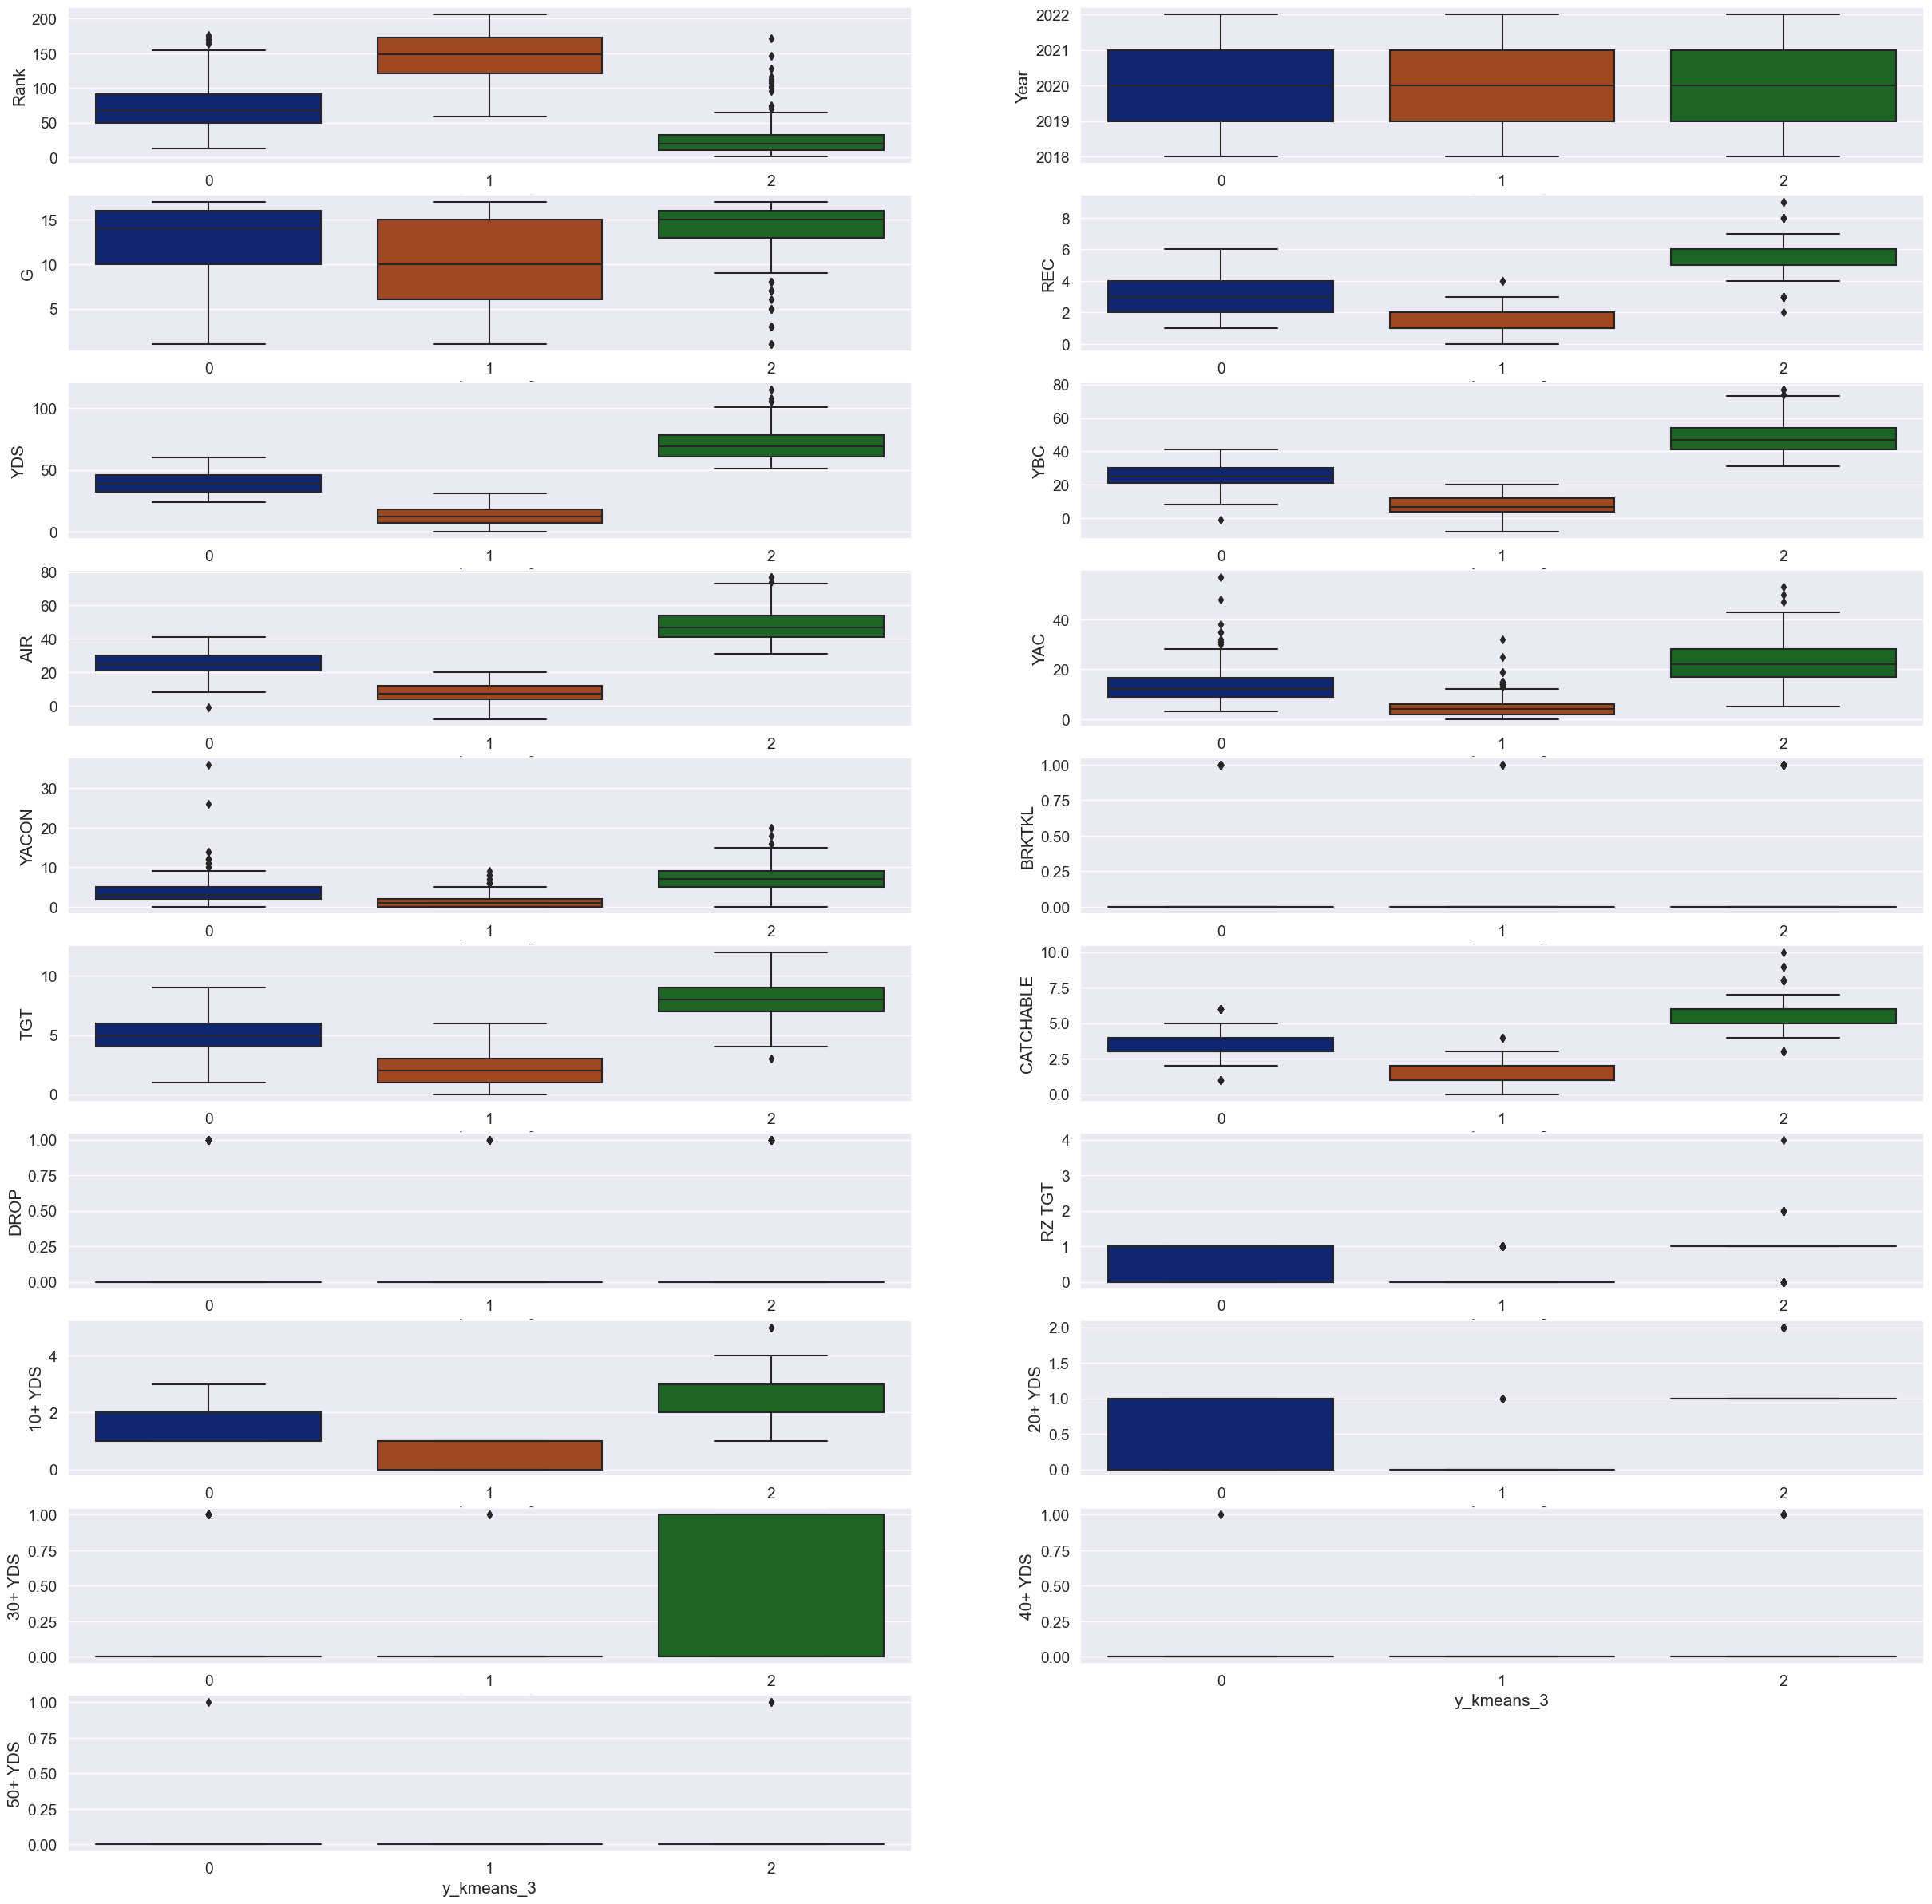

In [71]:
#box plot
num_list = ['Rank', 'Year', 'G', 'REC', 'YDS', 'YBC', 'AIR', 'YAC', 'YACON',
       'BRKTKL', 'TGT', 'CATCHABLE', 'DROP', 'RZ TGT', '10+ YDS', '20+ YDS',
       '30+ YDS', '40+ YDS', '50+ YDS']
fig = plt.figure(figsize=(30,30))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(10,2,i+1)
    sns.boxplot(x='y_kmeans_3',y=column,data=df,palette='dark')

https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624
https://machinelearningmastery.com/clustering-algorithms-with-python/